In [3]:
!pip install geneticalgorithm

     |████████████████████████████████| 44 kB 1.1 MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15098 sha256=bafe842160d70cb13036a204d0a99a0e594e3a48c47c6675d6cfaaf01c934eae
  Stored in directory: /root/.cache/pip/wheels/68/b5/a5/67c4364c354e141f5a1bd3ec568126f77877ab7554cf5af8cb
Successfully built func-timeout


In [4]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import pandas as pd
from statistics import variance as var

In [5]:
PATH = "/content/data.xlsx"
df = pd.read_excel(PATH)
df = df.iloc[:,0:4]

In [6]:
df

,Project No,KLOC,Method,Measured effort
0,1,90.2,30,115.8
1,2,46.2,20,96.0
2,3,46.5,19,79.0
3,4,54.5,20,90.8
4,5,31.1,35,39.6
5,6,67.5,29,98.4
6,7,12.8,36,18.9
7,8,10.5,34,10.3
8,9,21.5,31,28.5
9,10,3.1,26,7.0


In [7]:
KLOC = np.array(df['KLOC'])
effort = np.array(df['Measured effort'])
ME = np.array(df['Method'])

### Optimizing Basic COCOMO Model using Simplified Genetic Algorithm
_Rohit Kumar Sachan, Ayush Nigam, Avinash Singh, Sharad Singh, Manjeet Choudhary, Avinash Tiwari and Dharmender Singh Kushwaha_

#### Basic COCOMO Model:
 $$ 
 E = A × (KLOC)^B
 $$

In [ ]:
# fitness function Manhattan Distance(MD)
def MD(X):
  # X contains all the parameters
  # X[0] --> A
  # X[1] --> B
  estimated_effort = X[0] * (KLOC)**X[1]
  return np.sum(np.abs(effort - estimated_effort))

In [ ]:
varbound = np.array([[0, 10], [0.3, 2]]) # variable bounds

In [ ]:
algorithm_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.0,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

In [ ]:
model=ga(function=MD,dimension=2,variable_type='real',variable_boundaries=varbound) #algorithm_parameters=algorithm_param)

 The best solution found:
 [2.2886757 0.8890731]

 Objective function:
 111.40390186390593


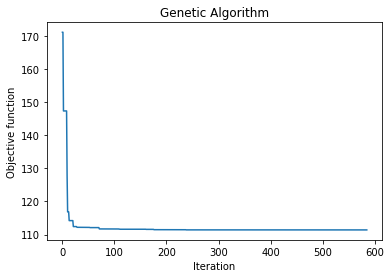

In [ ]:
model.run()

### Estimation of the COCOMO Model Parameters Using Genetic Algorithms for NASA Software Projects
_Alaa F. Sheta_


#### Basic COCOMO Model:
 $$ 
 E = A × (KLOC)^B
 $$

In [8]:
# fitness function Manhattan Distance(MD)
def VAF(X):
  # X contains all the parameters
  # X[0] --> a
  # X[1] --> b
  estimated_effort = X[0] * (KLOC)**(X[1])
  return -(1 - (var(effort - estimated_effort)/var(effort))) * 100

In [10]:
varbound = np.array([[0, 10], [0.3, 2]]) # variable bounds 

In [11]:
model = ga(function=VAF,dimension=2,variable_type='real',variable_boundaries=varbound) #algorithm_parameters=algorithm_param)

 The best solution found:
 [4.46646461 0.75069818]

 Objective function:
 -96.31390072978434


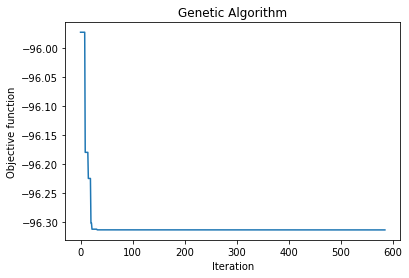

In [12]:
model.run()

#### Model 1:

$$ 
E = a × (KLOC)^b + c × (ME)
$$

In [23]:
# fitness function Manhattan Distance(MD)
def VAF(X):
  # X contains all the parameters
  # X[0] --> a
  # X[1] --> b
  # X[2] --> c
  pen = 0
  estimated_effort = X[0] * (KLOC)**(X[1]) + X[2]*(ME)
  if np.any(estimated_effort<0):
    pen = 5
  return -(1 - (var(effort - estimated_effort)/var(effort))) * 100 + pen

In [24]:
varbound = np.array([[0, 10], [0.3, 2], [-0.5, 0.5]]) # variable bounds 

In [25]:
model1 = ga(function=VAF,dimension=3,variable_type='real',variable_boundaries=varbound) #algorithm_parameters=algorithm_param)

 The best solution found:
 [ 6.78804041  0.66582215 -0.39645134]

 Objective function:
 -97.3864199712567


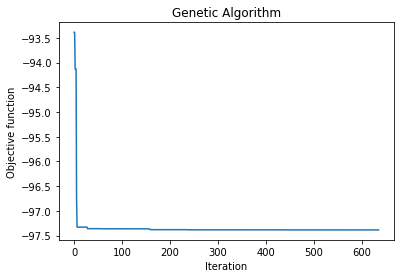

In [26]:
model1.run()

#### Model 2:

$$
E = a × (KLOC)^b + c × (ME) + d
$$

In [ ]:
# fitness function Manhattan Distance(MD)
def VAF(X):
  # X contains all the parameters
  # X[0] --> a
  # X[1] --> b
  # X[2] --> c
  # X[3] --> d
  estimated_effort = X[0] * (KLOC)**(X[1]) + X[2]*(ME) + X[3]
  return -(1 - (var(effort - estimated_effort)/var(effort))) * 100

In [ ]:
varbound = np.array([[0, 10], [0.3, 2], [-0.5, 0.5], [0, 20]]) # variable bounds 

In [ ]:
model2 = ga(function=VAF,dimension=4,variable_type='real',variable_boundaries=varbound) #algorithm_parameters=algorithm_param)

 The best solution found:
 [ 4.17794039  0.76603976 -0.49928328 17.89804287]

 Objective function:
 -97.74998020012272


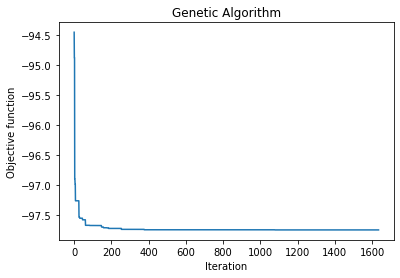

In [ ]:
model2.run()